In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

umc = pd.read_csv("Data/Urbanmart_cleaned.csv")

In [2]:
#Explore the cleaned Data:
umc.head()

,transaction_id,customer_id,transaction_date,transaction_value,product_category,payment_method,gender,age_group,region,transactionvalue_lakhs,t_month,t_month_name,t_year
0,TRANS000000,CUST01574,2023-04-09,467907,Sport,Bank Transfer,Female,>50,Surabaya,4.68,4,April,2023
1,TRANS000001,CUST01836,2024-08-05,2713789,Beauty,Credit Card,Female,26-35,Surabaya,27.14,8,August,2024
2,TRANS000002,CUST01291,2024-04-07,4539248,Fashion,Bank Transfer,Male,18-25,Bandung,45.39,4,April,2024
3,TRANS000003,CUST00245,2024-06-12,3058426,Home,Bank Transfer,Male,36-50,Jakarta,30.58,6,June,2024
4,TRANS000004,CUST00163,2023-12-18,3304874,Fashion,Bank Transfer,Female,26-35,Jakarta,33.05,12,December,2023


In [15]:
umc.tail()

,transaction_id,customer_id,transaction_date,transaction_value,product_category,payment_method,gender,age_group,region,transactionvalue_lakhs,t_month,t_month_name,t_year
49995,TRANS049995,CUST01247,2023-01-25,3236868,Fashion,Credit Card,Male,26-35,Yogyakarta,32.37,1,January,2023
49996,TRANS049996,CUST00019,2024-11-22,4966846,Home,Credit Card,Male,18-25,Bandung,49.67,11,November,2024
49997,TRANS049997,CUST01607,2024-06-08,1140521,Beauty,E-Wallet,Male,36-50,Yogyakarta,11.41,6,June,2024
49998,TRANS049998,CUST01304,2023-09-12,3504599,Beauty,Credit Card,Female,26-35,Denpasar,35.05,9,September,2023
49999,TRANS049999,CUST01537,2024-02-29,1089046,Beauty,Bank Transfer,Male,18-25,Yogyakarta,10.89,2,February,2024


In [16]:
umc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          50000 non-null  object 
 1   customer_id             50000 non-null  object 
 2   transaction_date        50000 non-null  object 
 3   transaction_value       50000 non-null  int64  
 4   product_category        50000 non-null  object 
 5   payment_method          50000 non-null  object 
 6   gender                  50000 non-null  object 
 7   age_group               50000 non-null  object 
 8   region                  50000 non-null  object 
 9   transactionvalue_lakhs  50000 non-null  float64
 10  t_month                 50000 non-null  int64  
 11  t_month_name            50000 non-null  object 
 12  t_year                  50000 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 5.0+ MB


In [17]:
umc.columns

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_value', 'product_category', 'payment_method', 'gender',
       'age_group', 'region', 'transactionvalue_lakhs', 't_month',
       't_month_name', 't_year'],
      dtype='object')

In [21]:
#Describe whole table:
umc.describe()

,transaction_value,transactionvalue_lakhs,t_month,t_year
count,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,2.534081e+06,25.340807,6.517880,2023.499600
std,1.429538e+06,14.295377,3.448623,0.500005
min,5.006000e+04,0.500000,1.000000,2023.000000
25%,1.304192e+06,13.040000,4.000000,2023.000000
50%,2.537391e+06,25.370000,7.000000,2023.000000
75%,3.768265e+06,37.680000,10.000000,2024.000000
max,4.999929e+06,50.000000,12.000000,2024.000000


In [ ]:
#Analysis the transcation value in lakhs:
umc['transactionvalue_lakhs'].describe() 

count    50000.000000
mean        25.340807
std         14.295377
min          0.500000
25%         13.040000
50%         25.370000
75%         37.680000
max         50.000000
Name: transactionvalue_lakhs, dtype: float64

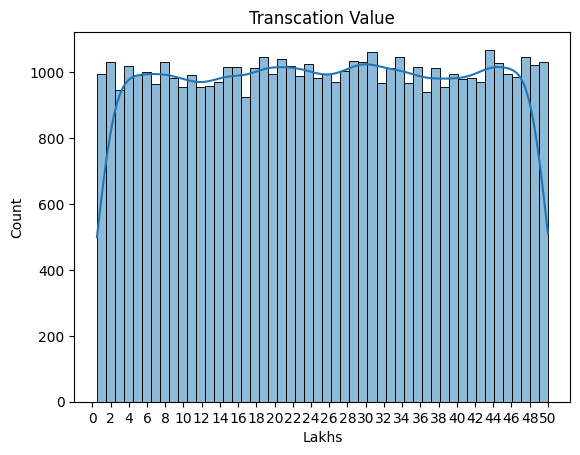

In [71]:
sns.histplot(data = umc,x=umc['transactionvalue_lakhs'],bins=50,kde=True)
plt.xticks(np.arange(0,51,2))
plt.title('Transcation Value')
plt.xlabel("Lakhs")
plt.ylabel("Count")
plt.show()

### Transcation value Analysis:
- From the chart , I can say that most of the transcations are between **5-30** lakhs
- The average transcation around aproximate of  **25** lakhs
- There is no outliers and the data is normally distributed 
- These makes most of the customers are **mid-range purchases**

In [84]:
# which gender has purchased more:
umc['gender'].unique()

array(['Female', 'Male'], dtype=object)

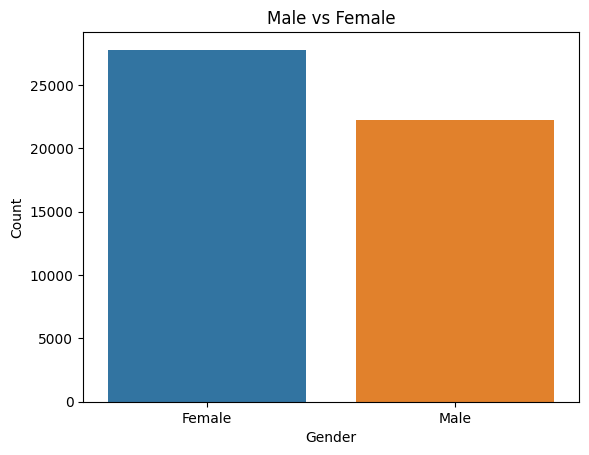

In [96]:
sns.countplot(data = umc,x = umc['gender'],hue='gender')
plt.title("Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Gender Analysis:
 - In **urbanmart** , The majority of cutomers are **Female** , This indicates that Women forms 
 large share of "customer base"
 - This could influence marketing and product targeting  strategies
  (eg : promoting categories like Beauty and Fashion more towards female customers)

In [110]:
# Product Category analysis:
umc['product_category'].unique()

array(['Sport', 'Beauty', 'Fashion', 'Home', 'Electronics'], dtype=object)

In [114]:
umc['product_category'].value_counts()

product_category
Beauty         10119
Fashion         9982
Home            9973
Electronics     9971
Sport           9955
Name: count, dtype: int64

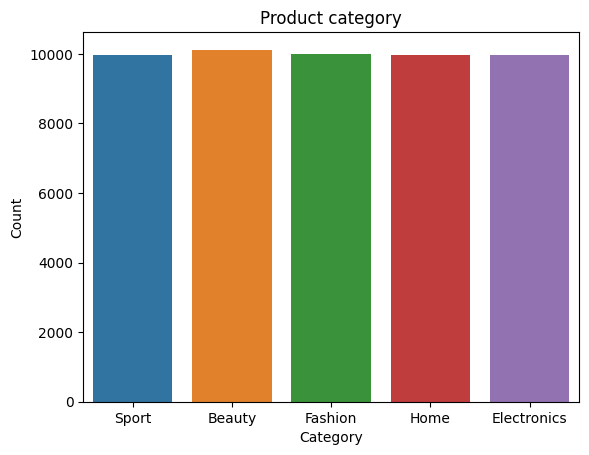

In [115]:
sns.countplot(data=umc,x=umc['product_category'],hue='product_category')
plt.title("Product category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Product category Analysis:
- The sales across product categories are very similar, with Beauty being the highest-selling category at 10,119 units, only slightly above other categories.

- This indicates a balanced demand across all categories, but Beauty products could be prioritized slightly for promotions or inventory planning to maximize revenue.

In [117]:
#Region Analysis:
region_count = umc['region'].value_counts()
umc['region'].unique()

array(['Surabaya', 'Bandung', 'Jakarta', 'Medan', 'Denpasar',
       'Yogyakarta'], dtype=object)

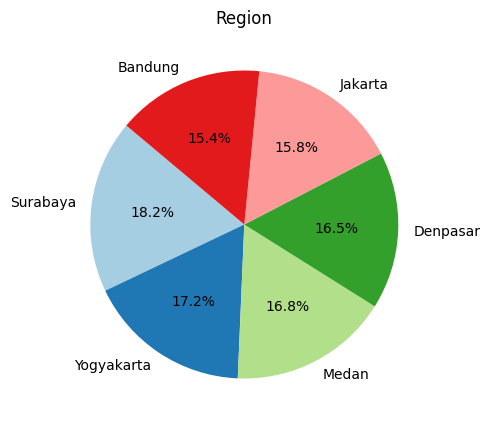

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%',colors=plt.cm.Paired.colors,startangle=140)
plt.title('Transcation By Region')
plt.show()

## Region Analysis:
- Most customers are from Surabaya and Yogyakarta, accounting for the largest share of transactions.

- Other regions have slightly lower transactions, with differences of only **~2 to 3%** , indicating a relatively balanced distribution of customers across regions.

In [4]:
#Age group analysis:
umc['age_group'].unique()

array(['>50', '26-35', '18-25', '36-50'], dtype=object)

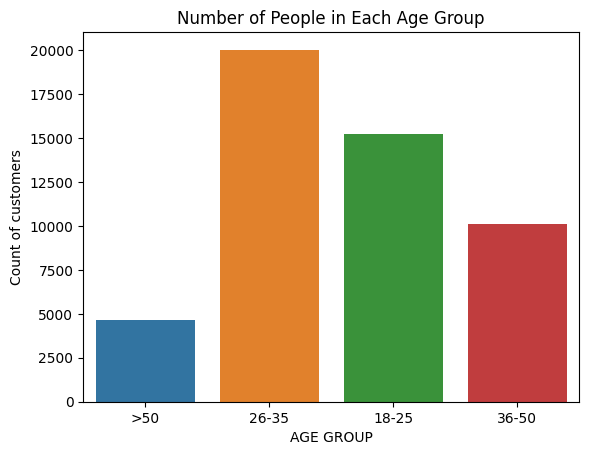

In [12]:
sns.countplot(data = umc,x=umc['age_group'],hue='age_group')
plt.title("Number of People in Each Age Group")
plt.xlabel("AGE GROUP")
plt.ylabel("Count of customers")
plt.show()

## Age_group analysis:
 -  The chart gives no of customers in which **age group** are present.
 - The half of the customers lies under age_group of **18-25** and **26-35**
 - From the age group distribution, around **50%** of customers fall in the **18–25** and **26–35** categories, showing that most of our audience is **young adults**. 


## 1. I want to know which Age_Group customer spend more  based on their transcation amount ?


In [8]:
# Total transcation by age_group:
age_trnx = umc.groupby('age_group')['transactionvalue_lakhs'].sum()

In [7]:
#Average transaction value per age group:
umc.groupby('age_group')['transactionvalue_lakhs'].mean()

age_group
18-25    25.526842
26-35    25.150675
36-50    25.342761
>50      25.546626
Name: transactionvalue_lakhs, dtype: float64

In [6]:
#count transaction value per age group:
umc.groupby('age_group')['transactionvalue_lakhs'].count()

age_group
18-25    15239
26-35    20020
36-50    10117
>50       4624
Name: transactionvalue_lakhs, dtype: int64

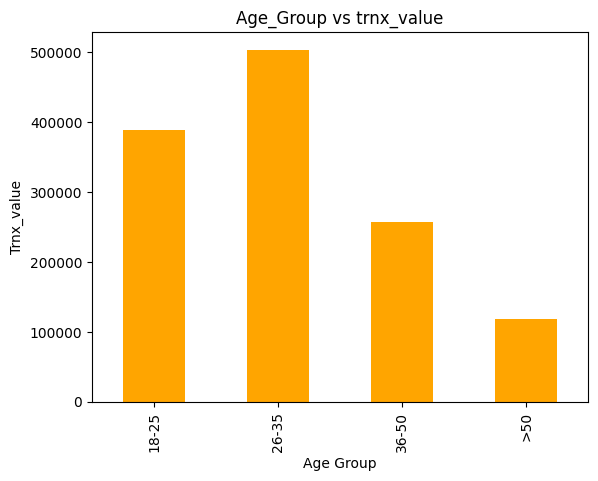

In [9]:
age_trnx.plot(kind='bar',color='orange')
plt.title('Age_Group vs trnx_value')
plt.xlabel('Age Group')
plt.ylabel('Trnx_value')
plt.show()

## Insights:
   - customers aged **26-35** has highest spending rate and more transcation values 
   - 60% to 70% transcations are covered by age groups  of **18-25** and **26-35**
   - Older customers **46+** contribute the least to revenue.

   ### conclusion:
      - The **18–35** age group contributes the majority of revenue  
      - SO,The Marketing campaigns should target this segment to maximize returns


## 2. Which product category have been purchased by customers age_groups and whom done lot of transcation ? 


In [111]:
# Most product category prefered by age groups 
umc.groupby('age_group')['product_category'].agg(lambda x: x.value_counts().idxmax())

age_group
18-25    Electronics
26-35         Beauty
36-50        Fashion
>50            Sport
Name: product_category, dtype: object

In [ ]:
pivot = umc.pivot_table(index='age_group',columns='product_category',values='transaction_value',aggfunc='count')
print(pivot)

product_category  Beauty  Electronics  Fashion  Home  Sport
age_group                                                  
18-25               3049         3091     3000  3020   3079
26-35               4083         3968     4018  4026   3925
36-50               2029         2009     2079  2011   1989
>50                  958          903      885   916    962


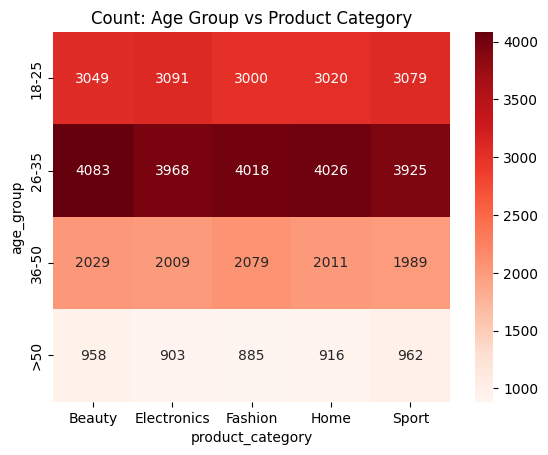

In [133]:
sns.heatmap(pivot,cmap='Reds',annot=True,fmt='.0f')
plt.title("Count: Age Group vs Product Category")
plt.show()

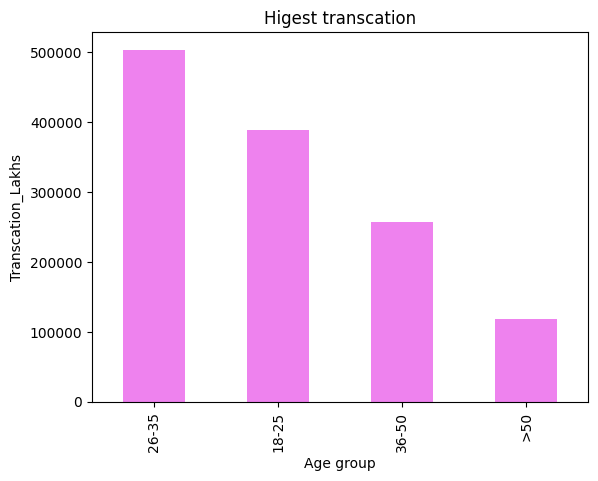

In [138]:
pivot_sum = umc.groupby('age_group')['transactionvalue_lakhs'].sum().sort_values(ascending=False)

pivot_sum.plot(kind='bar',color = 'Violet')
plt.title('Higest transcation')
plt.xlabel('Age group')
plt.ylabel('Transcation_Lakhs')
plt.show()

## Key insights:
  - Highr Transcation have done by age group of **26 to 35** . Because of they 
  have pruchased more products than other aged group 
  - Low Transcation have done by age group of **greater than 50** . Because of 
  they have purchased least count of products category 

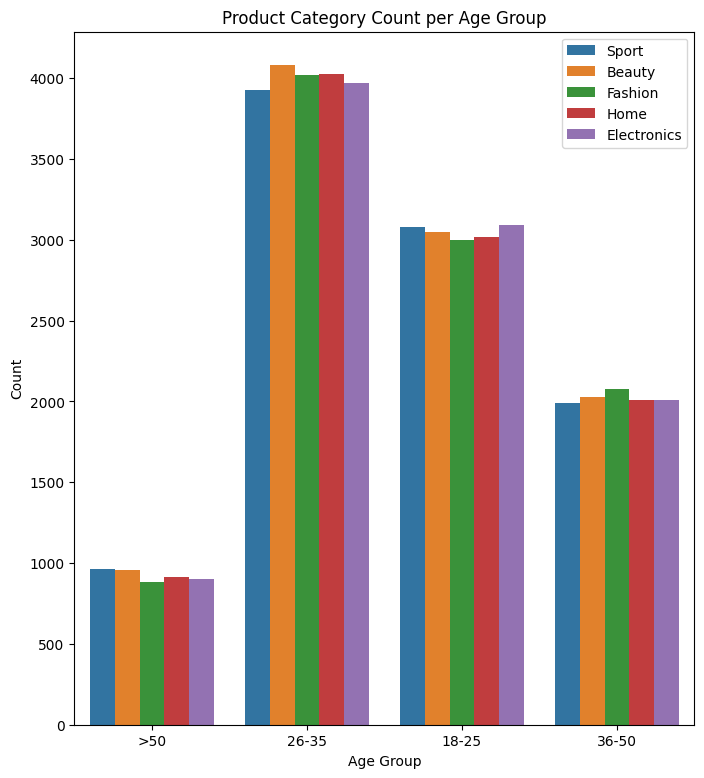

In [91]:
plt.figure(figsize=(8,9))
sns.countplot(data = umc,x='age_group',hue='product_category')
plt.title('Product Category Count per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.show()

## insights:
  - Most product prefered by age group :
      - 18-25  -  Electronics
      - 26-35  -  Beauty
      - 36-50  -  Fashion
      - greater than 50    -  Sport 

  - The age group **26–35** contributes the most to purchases across all product categories, followed by **18–25**, **36–50**, and **>50**.
  - All product categories are purchased almost equally across age groups, indicating no strong preference for any particular category.


## 3 . why greate than 50 aged people have been purchased least count products or have less transcation ?


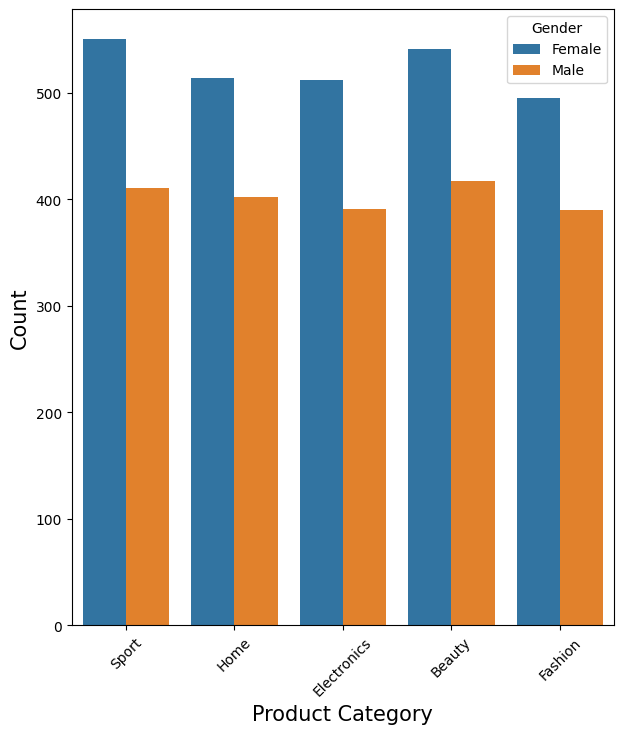

In [104]:
high_age_cus = umc[umc['age_group']=='>50']


plt.figure(figsize=(7,8))
sns.countplot(high_age_cus,x='product_category',hue='gender')
plt.xlabel('Product Category', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.xticks(rotation = 45)
plt.legend(title = 'Gender')
plt.show()

## Key Insights:
  - In greater than 50 aged group, **FEMALE** customers are higher and 
  There contribution is leading across all category than male customers 

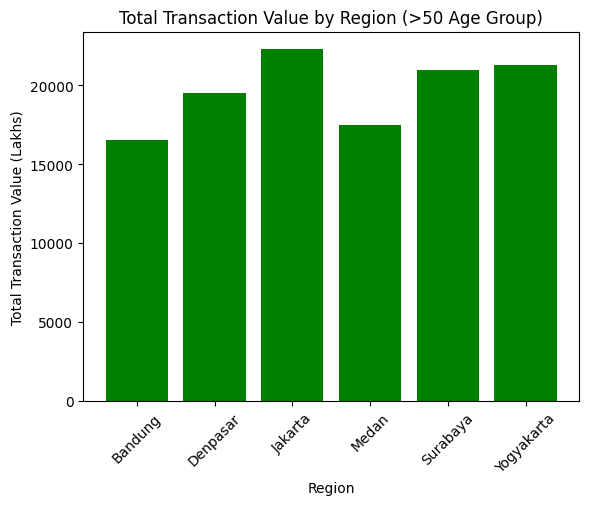

In [100]:
region_sum = high_age_cus.groupby('region')['transactionvalue_lakhs'].sum()

plt.Figure(figsize=(8,10))
plt.bar(region_sum.index, region_sum.values, color='green')
plt.xlabel('Region')
plt.ylabel('Total Transaction Value (Lakhs)')
plt.title('Total Transaction Value by Region (>50 Age Group)')
plt.xticks(rotation=45)
plt.show()

##  key Insights:
  - The higest transcation value(Lakhs) were done in **JAKARTA** , Followed by **SURABAYA**,**YOGYAKARTA** and more ...
  

## Time-Based Insights:

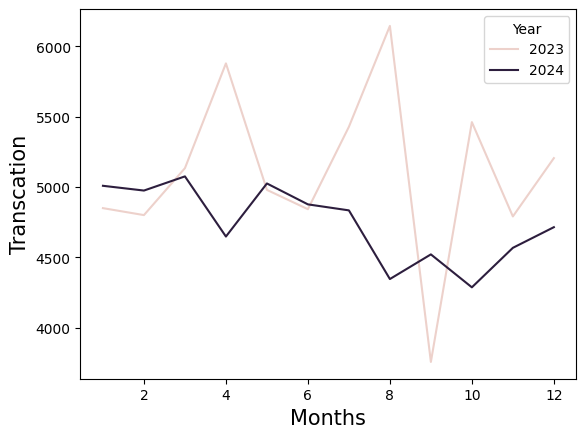

In [102]:
montly_transcation = high_age_cus.groupby(['t_year','t_month'])['transactionvalue_lakhs'].sum().reset_index()

sns.lineplot(data=montly_transcation,x='t_month',y='transactionvalue_lakhs',hue='t_year')
plt.xlabel('Months',fontsize = 15)
plt.ylabel('Transcation',fontsize = 15)
plt.legend(title='Year')
plt.show()

## Key Insights:
 - Trend: 2023 shows sharp ups and downs (high in Apr & Aug, low in Sep), while 2024 is slightly lower and more stable.
- Seasonality: Both years peak in Mar–Apr, drop in Sep (off-season).
-  Overall: >50 age group spending declined slightly in 2024

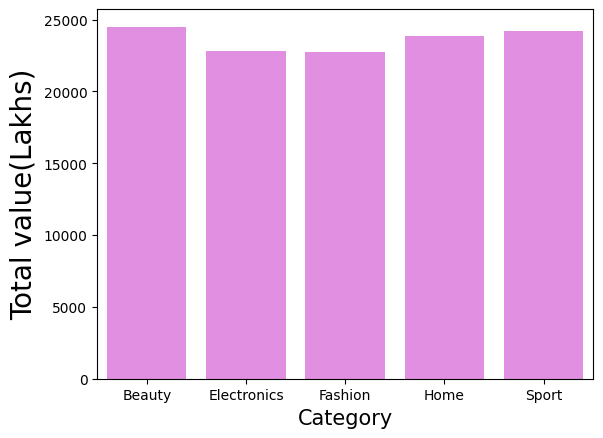

In [100]:
sum_value =  high_age_cus.groupby('product_category')['transactionvalue_lakhs'].sum().reset_index()

sns.barplot(data=sum_value,x='product_category',y='transactionvalue_lakhs',color='violet')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total value(Lakhs)',fontsize = 20)
plt.show()

## Insights:
#### Seasonal Strategy:
  -  Peak sales occur in March–April, so focus marketing campaigns during this period. Sales dip in September, so implement discounts or promotions to stimulate demand.

#### Product Strategy :
  - The majority of customers are female, so prioritize Beauty products, followed by Home and Sports categories.

#### Geographic Strategy:
  -  Concentrate marketing and inventory efforts in Jakarta, Yogyakarta, and Surabaya to capture the highest potential demand.

## 4.Which customers are repeated  and which are rare customers?

In [12]:
umc['customer_id'].nunique()

2000

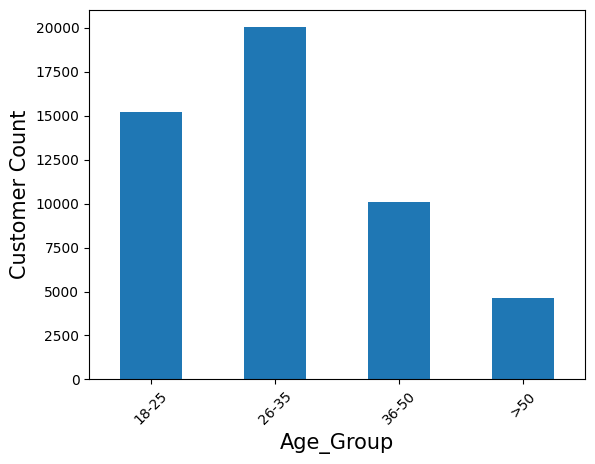

In [74]:
age_grp_cus = umc.groupby('age_group')['customer_id'].count()
age_grp_cus.plot(kind='bar')
plt.xlabel("Age_Group",fontsize = 15)
plt.ylabel("Customer Count", fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

C:\Users\Rabil khna\AppData\Local\Temp\ipykernel_16744\1133460319.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stage_counts,x='category_type',y='count',palette='Set2')


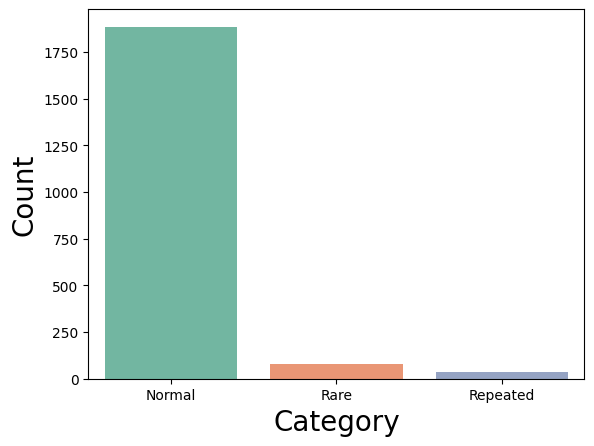

In [96]:
cus_trans_count = umc.groupby('customer_id')['transaction_id'].count().reset_index()
cus_trans_count.rename(columns={'transaction_id':'purchase_count'},inplace=True)

def category_stage(x):
  if x<=16:
    return 'Rare'
  elif 17<= x <= 35:
        return 'Normal'
  else:
        return 'Repeated'
  
cus_trans_count['category_type'] = cus_trans_count['purchase_count'].apply(category_stage)
stage_counts = cus_trans_count['category_type'].value_counts().reset_index()

sns.barplot(data=stage_counts,x='category_type',y='count',palette='Set2')
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()


## Insights:
 - Majority of customers belong to the ***26–35*** age range, followed by 18–25, 36–50, and >50.
 - **Rare** segment is the largest → most customers shop infrequently; your business may need loyalty programs or targeted offers.

 - **Repeated** segment dominates → strong customer retention and repeat purchase behavior.

- **Normal** is balanced → healthy mix between new and loyal customers.


## 5. Top 10 customers  are from which  Region:

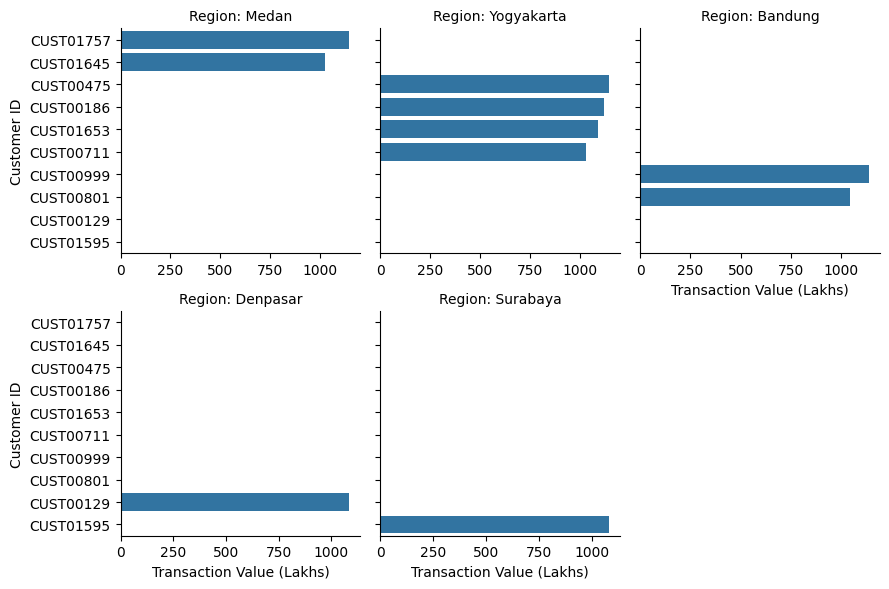

In [ ]:
Top_cus  = umc.groupby(['region','customer_id'])['transactionvalue_lakhs'].sum().reset_index()
Top_cus = Top_cus.sort_values(by='transactionvalue_lakhs',ascending=False).head(10)

g = sns.FacetGrid(Top_cus, col='region', col_wrap=3, sharex=False)
g.map_dataframe(sns.barplot, y='customer_id', x='transactionvalue_lakhs')
g.set_titles('Region: {col_name}' , fontsize = 10)
g.set_axis_labels('Transaction Value (Lakhs)', 'Customer ID')
plt.tight_layout()
plt.show()

## Insights:
- **Top Revenue Regions**: Yogyakarta and Bandung are the most critical regions, featuring the highest concentration of customers with transaction values over 1000 Lakhs.

- **Untapped Potential**: Denpasar and Surabaya are currently underperforming, each with only one high-value customer, suggesting a significant opportunity for market expansion and customer acquisition.

## 6. I want to the know the relations of two variables ?

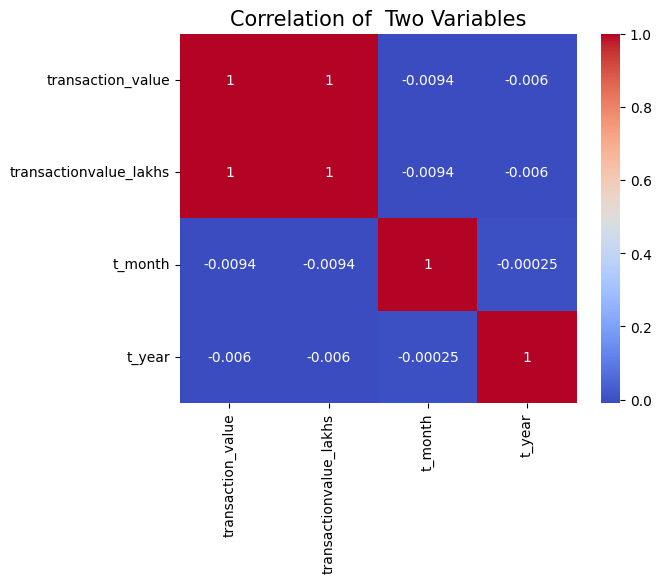

In [90]:
corr = umc[['transaction_value','transactionvalue_lakhs','t_month','t_year']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation of  Two Variables",fontsize = 15)
plt.show()


## 7. What is the revenue difference between 2023 and 2024?


In [78]:
# First see the region based and year wise:
revenue = umc.groupby(['region','t_year'])['transactionvalue_lakhs'].sum().reset_index()

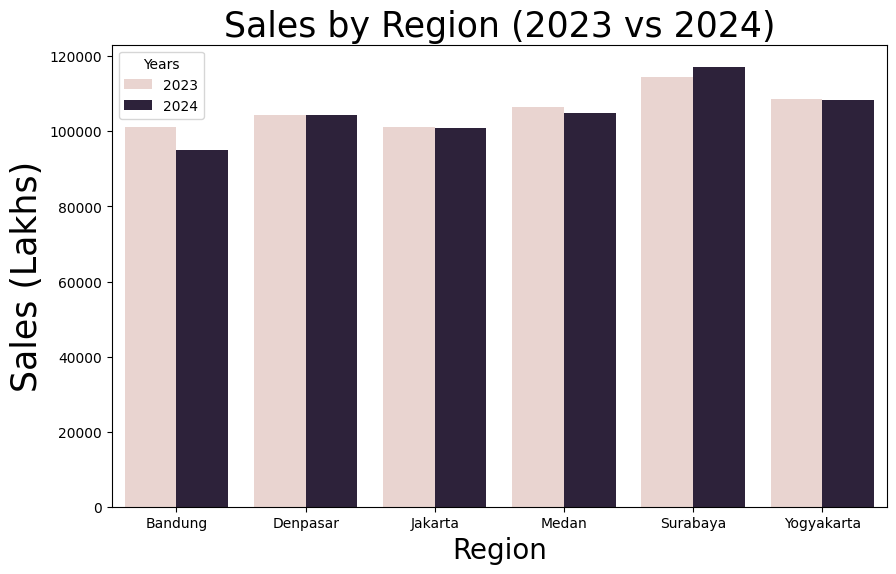

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=revenue , x='region', y='transactionvalue_lakhs', hue='t_year' )
plt.title('Sales by Region (2023 vs 2024)', fontsize = 25)
plt.xlabel('Region',fontsize = 20)
plt.ylabel('Sales (Lakhs)',fontsize = 25)
plt.legend(title = 'Years')
plt.show()


In [109]:
umc.head(1)

,transaction_id,customer_id,transaction_date,transaction_value,product_category,payment_method,gender,age_group,region,transactionvalue_lakhs,t_month,t_month_name,t_year
0,TRANS000000,CUST01574,2023-04-09,467907,Sport,Bank Transfer,Female,>50,Surabaya,4.68,4,April,2023


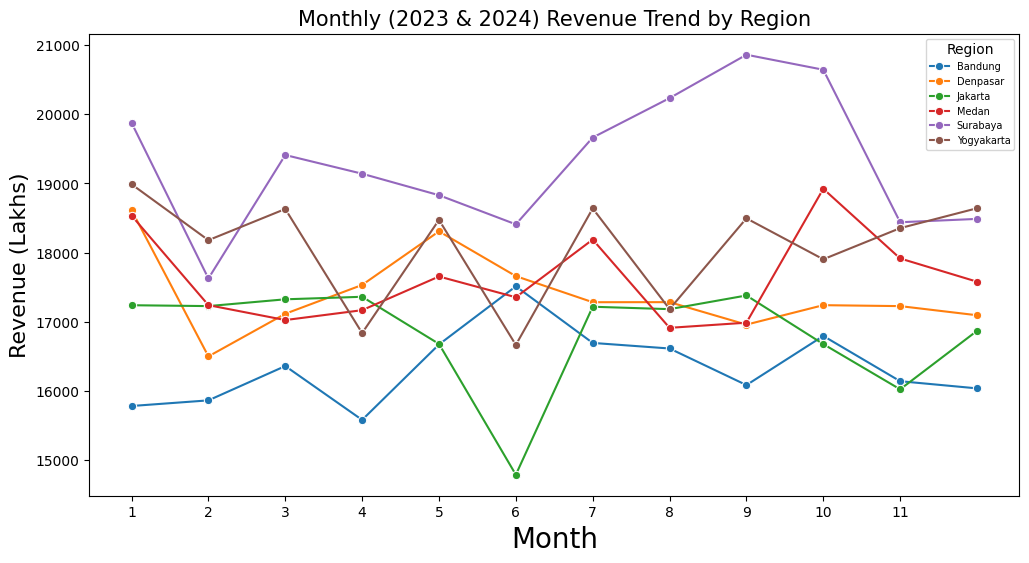

In [123]:
# First see the region based and monthly wise:
revenue = umc.groupby(['region','t_month'])['transactionvalue_lakhs'].sum().reset_index()



plt.figure(figsize=(12,6))
sns.lineplot(data=revenue, x='t_month', y='transactionvalue_lakhs', hue='region', marker='o')
plt.title('Monthly (2023 & 2024) Revenue Trend by Region',fontsize = 15)
plt.xlabel('Month',fontsize = 20)
plt.ylabel('Revenue (Lakhs)' , fontsize = 16)
plt.legend(title = 'Region',fontsize = 7)
plt.xticks(range(1,12))
plt.show()



## Insights:
  -  **YEAR SALES BY REGION :**
      - **Surabaya** has increased sales in 2024 compare to 2023 
      - ***Jakarta,Yogyakarta,Denpasar*** . These three region has constant sales from  both year 2023 and 2024.
      - **Bandung** Sales has  slightly drop down in 2024 and **Medan** has very small drop down in 2024
       
  - **MONTH SALES BY REGION:**
      - ***Surabaya*** and ***Yogyakarta*** revenues peak highest in Month 9 and Month 10, respectively.

      - ***Action***: Concentrate resources (staff, inventory, marketing budget) in these regions during those specific months to capitalize on proven demand and maximize profit capture.

      - ***Jakarta*** shows the lowest overall floor, with an extreme revenue trough in Month 6.

      - ***Action***: Investigate the root cause of the Month 6 crash and the overall low performance in Jakarta immediately. This requires a focused fix, not just general market efforts.

In [13]:
# What is the difference of 2024 sales and 2023 sales :
sales_2023 = umc.loc[umc['t_year']==2023,'transactionvalue_lakhs'].sum()
sales_2024 = umc.loc[umc['t_year']==2024,'transactionvalue_lakhs'].sum()
print(f"sale of 2023 : {sales_2023}")
print(f"sales of 2024 : {sales_2024:.2f}")

sales_diff = sales_2024 - sales_2023
print(f"sales_diff : {sales_diff :.2f}")

sale of 2023 : 636183.49
sales of 2024 : 630856.87
sales_diff : -5326.62


In [ ]:
# what is the average sales of 2024 and 2023:
avg_2023 = umc.loc[umc['t_year']==2023,'transactionvalue_lakhs'].mean()
print(f"avg_2023 : {avg_2023}")
avg_2024  = umc.loc[umc['t_year']==2024,'transactionvalue_lakhs'].mean()
print(f"avg_2024:{avg_2024:.2f}")

avg_2023 : 25.426998001598722
avg_2024:25.25


## 8 .Why year of 2024 sales has drop down ?

In [79]:
# Check the difference with region wise :
revenue_pivot  = revenue.pivot_table(index='region',columns = 't_year',values='transactionvalue_lakhs')
revenue_pivot['diff_r'] = revenue_pivot[2024] - revenue_pivot[2023]

print(revenue_pivot)

t_year           2023       2024   diff_r
region                                   
Bandung     101179.38   94965.47 -6213.91
Denpasar    104345.43  104473.68   128.25
Jakarta     101162.94  100813.59  -349.35
Medan       106473.83  105013.03 -1460.80
Surabaya    114400.94  117219.71  2818.77
Yogyakarta  108620.97  108371.39  -249.58


In [104]:
# percenatge finding:
revenue_pivot['percentage'] = ((revenue_pivot[2024] - revenue_pivot[2023]) / revenue_pivot[2023]) * 100
print(revenue_pivot['percentage'])


region
Bandung      -6.141479
Denpasar      0.122909
Jakarta      -0.345334
Medan        -1.371980
Surabaya      2.463940
Yogyakarta   -0.229771
Name: percentage, dtype: float64


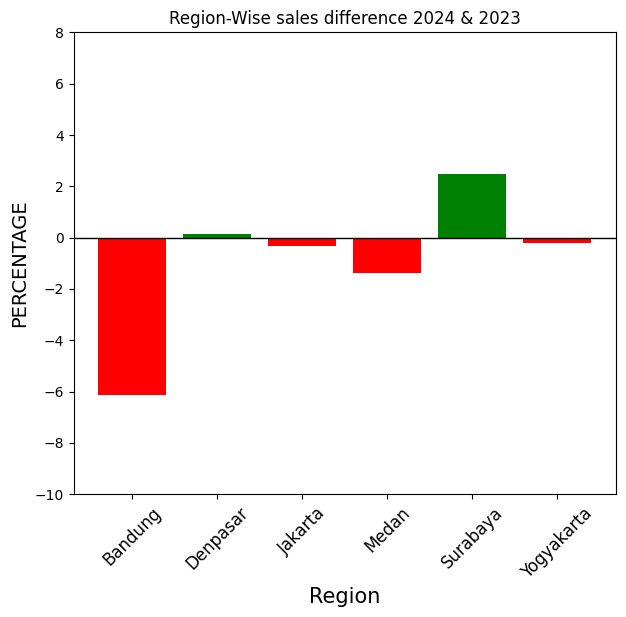

In [ ]:
colors  = ['red' if x<0 else 'green' for x in revenue_pivot['diff_r']]
plt.figure(figsize=(7,6))
plt.bar(x=revenue_pivot.index,height=revenue_pivot['percentage'],color = colors)


plt.title('Region-Wise sales difference 2024 & 2023')
plt.xticks(rotation = 45,fontsize = 12)
plt.xlabel("Region", fontsize = 15)
plt.yticks(range(-10,10,2))
plt.ylabel("PERCENTAGE" ,fontsize = 14)
plt.axhline(0,linewidth = 1,color = 'black')
plt.show()


## Key insights:
 - **Insight** :
Bandung recorded the largest sales drop (-6%) in 2024. The monthly trend shows unstable performance, indicating a consistent fall in key customer activity and weak sales recovery.

- **Action** :
Focus on customer retention and engagement strategies. Strengthen relationships through follow-ups, feedback collection, and loyalty offers to recover lost revenue and stabilize performance.

- **Insight** :
Surabaya achieved the highest total sales and around +3% growth in 2024. A major sales peak in Month 9 shows that marketing or seasonal campaigns worked effectively

- **Action** :
Analyze the successful Month 9 strategy and apply similar campaigns in stable regions like Denpasar to boost their growth potential.

t_year                 2023       2024   diff_p
product_category                               
Beauty            128431.68  126840.58 -1591.10
Electronics       123856.82  129179.01  5322.19
Fashion           127314.12  124594.90 -2719.22
Home              127961.50  126327.10 -1634.40
Sport             128619.37  123915.28 -4704.09


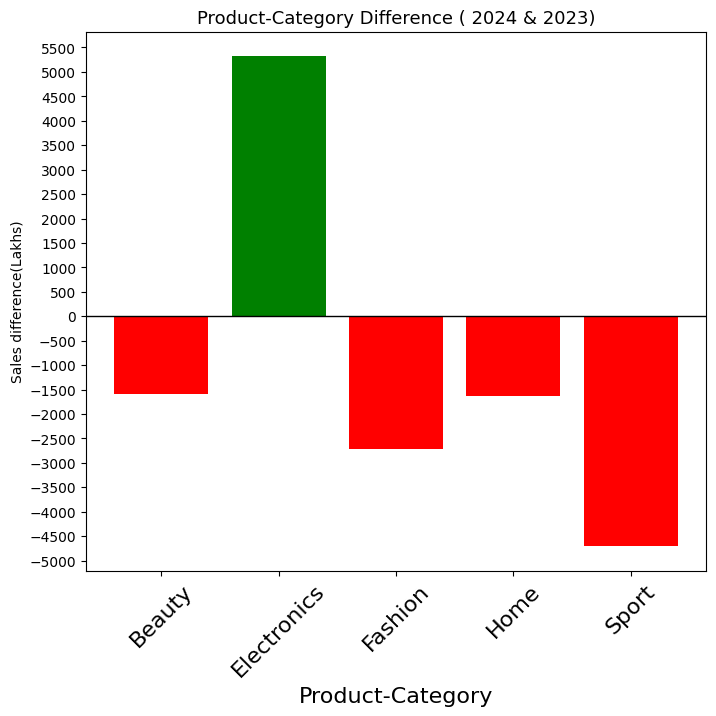

In [ ]:
# check the difference with category-wise:
product_sales_year = umc.groupby(['product_category','t_year'])['transactionvalue_lakhs'].sum().reset_index()

product_pivot = product_sales_year.pivot_table(values='transactionvalue_lakhs',index='product_category',columns='t_year')

product_pivot['diff_p'] = product_pivot[2024]-product_pivot[2023]
print(product_pivot)

colors  = ['red' if x<0 else 'green' for x in product_pivot['diff_p']]

plt.figure(figsize=(8,10))
plt.bar(x=product_pivot.index,height=product_pivot['diff_p'],color = colors)
plt.title("Product-Category Difference ( 2024 & 2023)",fontsize = 13)
plt.axhline(0,linewidth = 1,color = 'black')
plt.xlabel("Product-Category",fontsize = 16)
plt.ylabel("Sales difference(Lakhs)",fontsize = 10)
plt.xticks(rotation = 45,fontsize = 16)
plt.yticks(range(-5000,6000,500))
plt.show()


 ## 1.Electronics Growth Hides Major Regional Problems:

**Observation**:
- Sales in the Electronics category increased by about +5,500 Lakhs, helping overall growth in Surabaya and Denpasar.
But Bandung shows a big loss (around −6,000 Lakhs), indicating serious performance issues.

**Insight**:
- The strong growth in Electronics is covering up a major decline in Bandung.
If this continues, the total company sales could start falling.
Action: Focus on fixing customer and sales issues in Bandung while keeping Electronics growth steady across all regions

## 2.Business Too Dependent on Electronics:

**Observation**:
- Only Electronics is growing, while Fashion, Sport, Home, and Beauty together dropped by around −10,000 Lakhs.
Jakarta also faced a sharp fall in Month 6.

**Insight**:
- The company is relying too much on one category. If Electronics slows down, total sales will drop sharply.
Action: Work on improving other categories like Fashion and Sport to create balanced growth and reduce risk.

## 9. Which payment mode is most used bythe customers?

In [71]:
average_transcation_method  = umc.groupby('payment_method')['transactionvalue_lakhs'].mean()
print(average_transcation_method)

payment_method
Bank Transfer    25.418987
Credit Card      25.414187
E-Wallet         25.188444
Name: transactionvalue_lakhs, dtype: float64


  payment_methods  transcation_count
0   Bank Transfer              16794
1        E-Wallet              16610
2     Credit Card              16596


C:\Users\Rabil khna\AppData\Local\Temp\ipykernel_25616\2174169199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_counts,x='payment_methods',y='transcation_count',palette='magma')


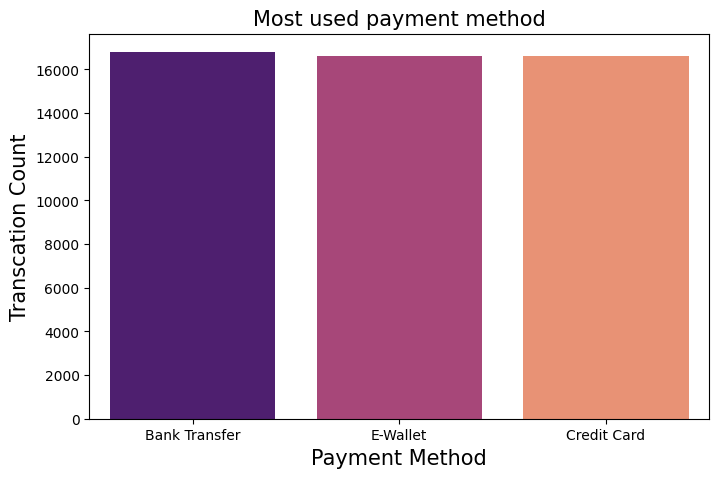

In [22]:
payment_counts = umc['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_methods','transcation_count']
print(payment_counts)

plt.figure(figsize=(8,5))
sns.barplot(data=payment_counts,x='payment_methods',y='transcation_count',palette='magma')
plt.title("Most used payment method",fontsize = 15)
plt.xlabel("Payment Method",fontsize = 15)
plt.ylabel("Transcation Count",fontsize = 15)
plt.show()

## Key insights:
 -  Commonly all three payment methods are same with very slight difference in Bank Transfer
 

## 10.  Are there seasonal or monthly trends in transactions?

In [43]:
umc.head(1)

,transaction_id,customer_id,transaction_date,transaction_value,product_category,payment_method,gender,age_group,region,transactionvalue_lakhs,t_month,t_month_name,t_year
0,TRANS000000,CUST01574,2023-04-09,467907,Sport,Bank Transfer,Female,>50,Surabaya,4.68,4,April,2023


t_month
1     109037.04
2     102638.48
3     105868.95
4     103622.63
5     106618.25
6     102392.76
7     107686.36
8     105411.52
9     106768.67
10    108183.97
11    104101.22
12    104710.51
Name: transactionvalue_lakhs, dtype: float64


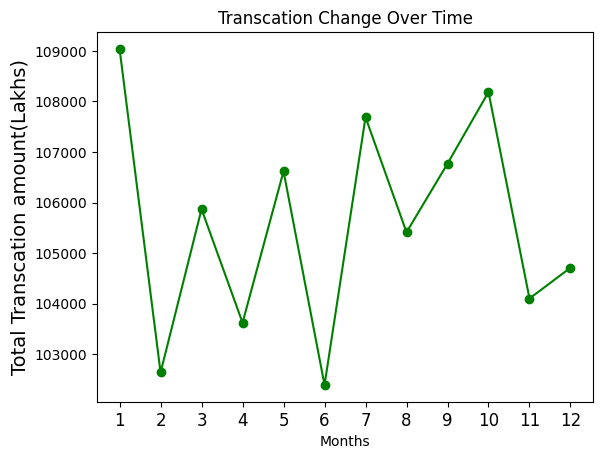

In [67]:
monthly_sales = umc.groupby('t_month')['transactionvalue_lakhs'].sum()
print(monthly_sales)

monthly_sales.plot(kind='line',marker = 'o',color = 'green')
plt.title('Transcation Change Over Time')
plt.xticks(range(1,13),fontsize = 12)
plt.xlabel("Months")
plt.ylabel("Total Transcation amount(Lakhs)",fontsize = 14)
plt.show()

## Key insights :



## 11.Which specific regions are the primary drivers of the year-over-year growth (or decline) in the Electronics product category?

In [ ]:
# 1. Group the data by three dimensions
multi_sales = umc.groupby(['region', 'product_category', 't_year'])['transactionvalue_lakhs'].sum().reset_index()

# 2. Filter for the key category (Electronics)
electronics_regional = multi_sales[multi_sales['product_category'] == 'Electronics']

# 3. Pivot the table to compare 2024 vs 2023 for the Electronics category
electronics_pivot = electronics_regional.pivot_table(
    values='transactionvalue_lakhs',
    index='region',
    columns='t_year'
)

# 4.Calculate the difference:
electronics_pivot['Electronics_Growth_2024'] = electronics_pivot[2024] - electronics_pivot[2023]

print(electronics_pivot)

t_year          2023      2024  Electronics_Growth_2024
region                                                 
Bandung     19999.74  20147.49                   147.75
Denpasar    20869.21  21028.13                   158.92
Jakarta     20566.00  19249.41                 -1316.59
Medan       20337.31  21587.03                  1249.72
Surabaya    21774.99  25199.20                  3424.21
Yogyakarta  20309.57  21967.75                  1658.18


C:\Users\Rabil khna\AppData\Local\Temp\ipykernel_25616\3767652237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


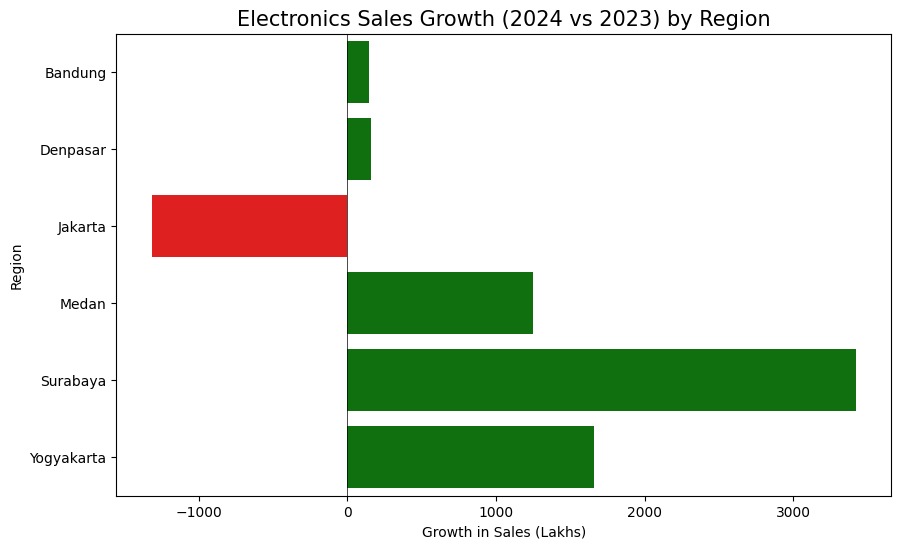

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=electronics_pivot.reset_index(),
    x='Electronics_Growth_2024',
    y='region',
    palette=['green' if x > 0 else 'red' for x in electronics_pivot['Electronics_Growth_2024']]
)
plt.title('Electronics Sales Growth (2024 vs 2023) by Region',fontsize = 15)
plt.xlabel('Growth in Sales (Lakhs)')
plt.ylabel('Region')
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## 12. What is the total revenue contribution of each product category to Surabaya's sales in 2024?

C:\Users\Rabil khna\AppData\Local\Temp\ipykernel_25616\3371578275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


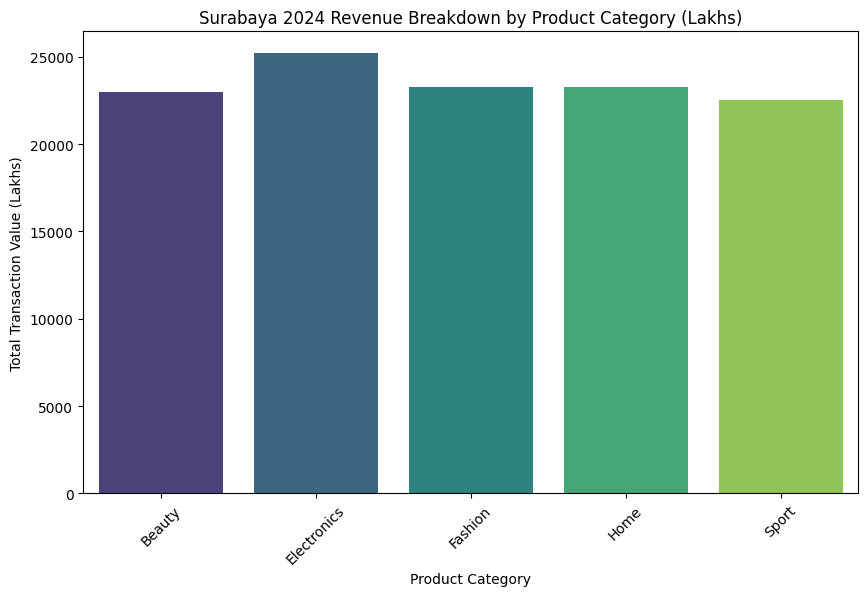

In [131]:
# Filter data for the high-growth year (2024) and the target region (Surabaya)
surabaya_2024_sales = umc[(umc['t_year'] == 2024) & (umc['region'] == 'Surabaya')]

# Group sales by product category for that region/year
product_breakdown = surabaya_2024_sales.groupby('product_category')['transactionvalue_lakhs'].sum().reset_index()

# Visualize the breakdown using a simple bar plot:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=product_breakdown,
    x='product_category',
    y='transactionvalue_lakhs',
    palette='viridis' 
)
plt.title('Surabaya 2024 Revenue Breakdown by Product Category (Lakhs)')
plt.xlabel('Product Category')
plt.ylabel('Total Transaction Value (Lakhs)')
plt.xticks(rotation=45)
plt.show()

## 13. Which specific customer demographic (combination of Gender and Age Group) demonstrates the highest average spending power?

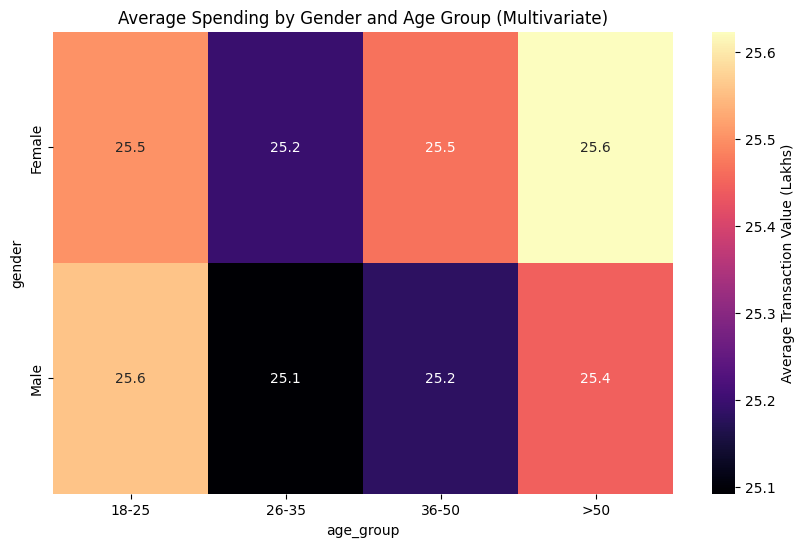

In [ ]:
# Group data by Gender and Age Group and calculate the average transaction value (a better measure of spending power than total sum)
demographic_spending = umc.groupby(['gender', 'age_group'])['transactionvalue_lakhs'].mean().reset_index()

# Pivot the data into a matrix format required for a heatmap
heatmap_data = demographic_spending.pivot_table(
    values='transactionvalue_lakhs',
    index='gender',
    columns='age_group'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,         
    fmt=".1f",          
    cmap='magma',       
    cbar_kws={'label': 'Average Transaction Value (Lakhs)'}
)

plt.title('Average Spending by Gender and Age Group (Multivariate)')
plt.show()

## key Insights :
  - The darkest cell indicates your highest-value customer demographic. Target marketing efforts exclusively toward this group.

## 14.When are the sales peaks and troughs for the Sport and Fashion product categories?

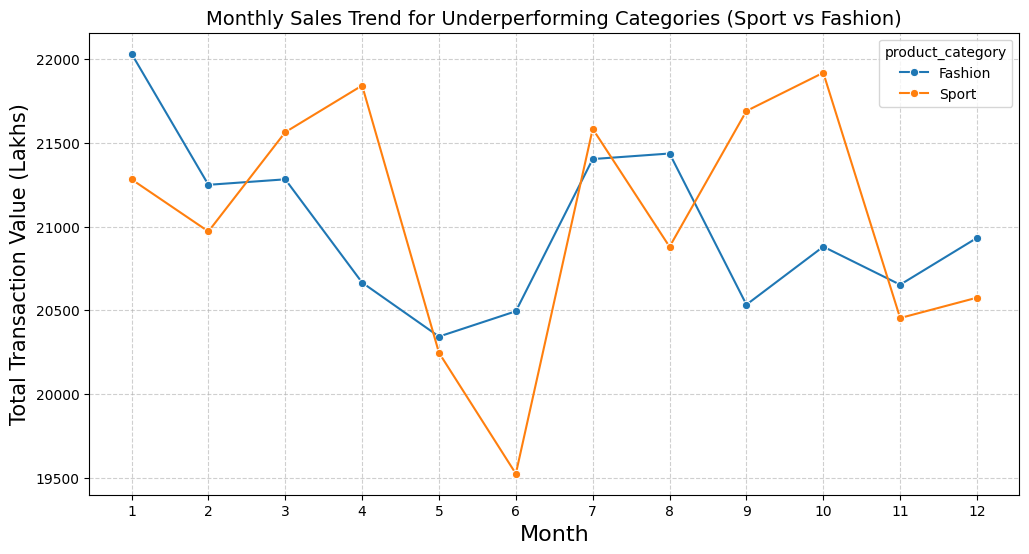

In [134]:
# Filter data for the two underperforming categories
target_categories = ['Sport', 'Fashion']
underperforming_sales = umc[umc['product_category'].isin(target_categories)]

# Group sales by Month and Product Category
monthly_trend_products = underperforming_sales.groupby(['t_month', 'product_category'])['transactionvalue_lakhs'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_trend_products,
    x='t_month',
    y='transactionvalue_lakhs',
    hue='product_category', 
    marker='o'
)
plt.title('Monthly Sales Trend for Underperforming Categories (Sport vs Fashion)' , fontsize = 14)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Total Transaction Value (Lakhs)', fontsize = 15)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Key insights:
   -  The lowest points on each line represent the months when promotional efforts or inventory review are most needed to prevent annual revenue loss.

## 15 ."What products are causing Bandung's sales to drop?"

C:\Users\Rabil khna\AppData\Local\Temp\ipykernel_25616\4168727220.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


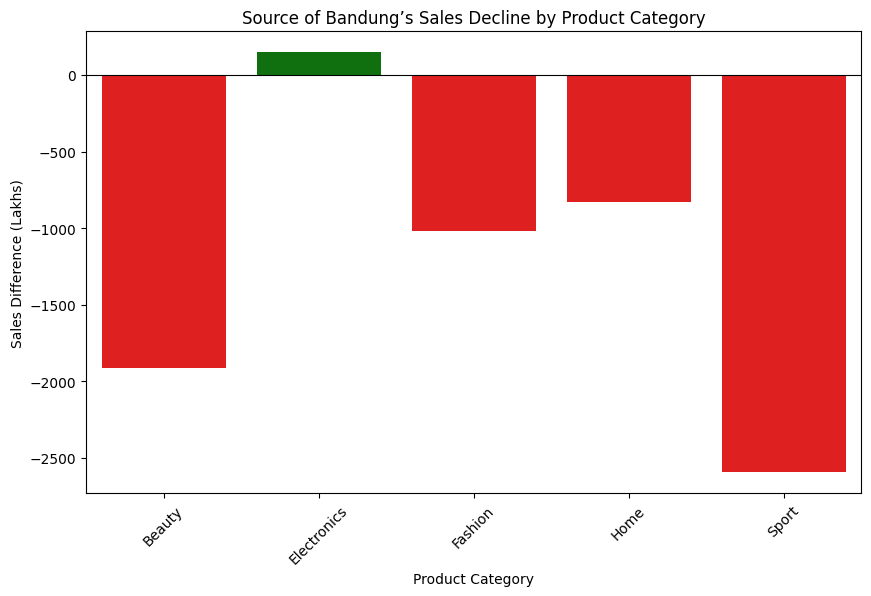

In [ ]:
# 1. Filter for Bandung only and calculate sales by product and year
bandung_sales = umc[umc['region'] == 'Bandung']
bandung_product_year = bandung_sales.groupby(['product_category', 't_year'])['transactionvalue_lakhs'].sum().reset_index()

# 2. Pivot and calculate the difference (2024 - 2023)
bandung_pivot = bandung_product_year.pivot_table(
    values='transactionvalue_lakhs',
    index='product_category',
    columns='t_year'
).fillna(0)

bandung_pivot['Bandung_Growth_2024'] = bandung_pivot[2024] - bandung_pivot[2023]

# 3. Visualize the specific decline sources in Bandung
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bandung_pivot.reset_index(),
    x='product_category',
    y='Bandung_Growth_2024',
    palette=['red' if x < 0 else 'green' for x in bandung_pivot['Bandung_Growth_2024']]
)
plt.title("Source of Bandung's Sales Decline by Product Category")
plt.xlabel('Product Category')
plt.ylabel('Sales Difference (Lakhs)')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()


## Key insights:
 - You will see the exact products that need fixing in Bandung to stabilize revenue and protect the key accounts.

## 16. Monthly Trend of High-Growth vs High-Decline Products ?

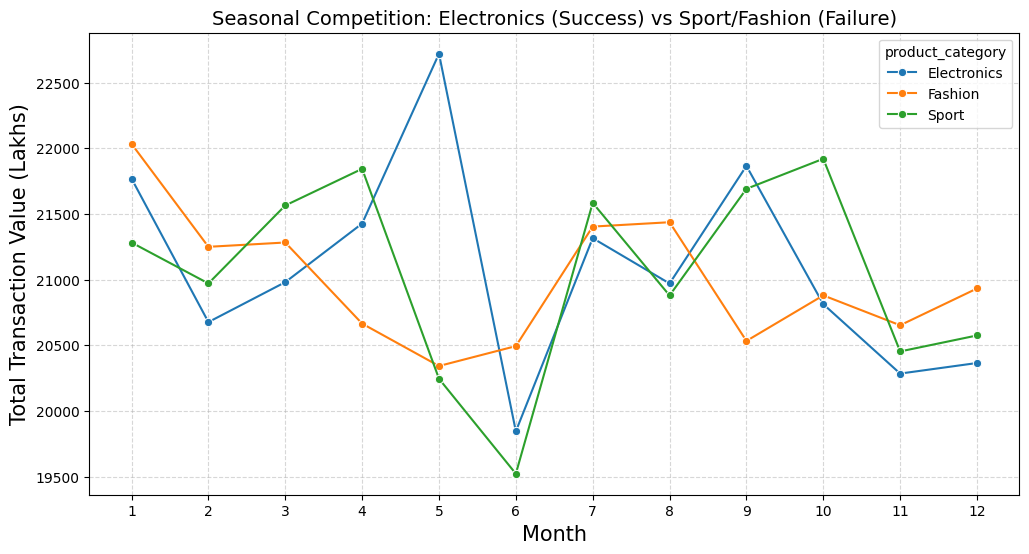

In [3]:
# 1. Filter for the three most critical product categories
critical_categories = ['Electronics', 'Sport', 'Fashion']
critical_sales = umc[umc['product_category'].isin(critical_categories)]

# 2. Group total sales by Month and Product Category 
monthly_product_trend = critical_sales.groupby(['t_month', 'product_category'])['transactionvalue_lakhs'].sum().reset_index()

# 3. Visualize the competing seasonal trends
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_product_trend,
    x='t_month',
    y='transactionvalue_lakhs',
    hue='product_category',
    marker='o'
)

plt.title('Seasonal Competition: Electronics (Success) vs Sport/Fashion (Failure)' , fontsize = 14)
plt.xlabel('Month' ,fontsize = 15)
plt.ylabel('Total Transaction Value (Lakhs)' , fontsize = 15)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Key inisghts:
 - You can determine if the underperforming categories simply need more promotion during the peak buying months or if their decline is year-round.